In [1]:
import os
os.environ['QT_QPA_PLATFORM'] = 'offscreen'

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import RocCurveDisplay, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from joblib import dump, load

In [5]:
df = pd.read_csv(r'data/bank_data.csv')
df.sample(10)

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1620,1620,715055433,Existing Customer,36,M,3,Uneducated,Married,$60K - $80K,Blue,...,3,4,2224.0,1772,452.0,0.810,2004,44,0.419,0.797
6345,6345,710284233,Attrited Customer,33,M,4,Uneducated,Married,$80K - $120K,Blue,...,3,4,1438.3,0,1438.3,0.980,2439,43,0.720,0.000
3030,3030,717804783,Existing Customer,40,F,3,Graduate,Single,Less than $40K,Blue,...,3,4,6587.0,824,5763.0,1.262,4160,70,0.842,0.125
2326,2326,716207508,Existing Customer,36,M,3,High School,Married,$60K - $80K,Blue,...,2,4,5497.0,1517,3980.0,0.624,1981,38,0.357,0.276
8622,8622,714047733,Existing Customer,53,F,3,Graduate,Single,$40K - $60K,Blue,...,2,1,4942.0,2119,2823.0,0.718,7460,85,0.604,0.429
7923,7923,718548558,Existing Customer,53,F,3,Unknown,Single,Less than $40K,Blue,...,1,3,2915.0,2041,874.0,0.927,4272,70,0.750,0.700
3177,3177,713316558,Existing Customer,41,M,4,High School,Married,$60K - $80K,Blue,...,2,2,4573.0,0,4573.0,0.703,3776,70,0.944,0.000
6780,6780,719323683,Existing Customer,47,F,3,Uneducated,Single,$40K - $60K,Blue,...,5,2,4543.0,1028,3515.0,0.799,4093,77,0.571,0.226
7027,7027,789634983,Existing Customer,59,M,1,Graduate,Married,$40K - $60K,Blue,...,1,2,4188.0,2200,1988.0,0.867,4911,86,0.720,0.525
2521,2521,709897983,Existing Customer,35,F,2,Doctorate,Married,$40K - $60K,Blue,...,2,3,2655.0,1527,1128.0,0.715,1921,26,0.444,0.575


In [6]:
df.shape

(10127, 22)

In [12]:
df.isnull().sum()

Unnamed: 0                  0
CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
df.describe()

,Unnamed: 0,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,5063.000000,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,2923.557422,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,2531.500000,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,5063.000000,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7594.500000,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,10126.000000,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [13]:
cat_columns = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category',
]

num_columns = [
    'Customer_Age',
    'Dependent_count',
    'Months_on_book',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Credit_Limit',
    'Total_Revolving_Bal',
    'Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio',
]

In [14]:
df['Churn'] = df['Attrition_Flag'].apply(lambda val: 0 if val == 'Existing Customer' else 1)

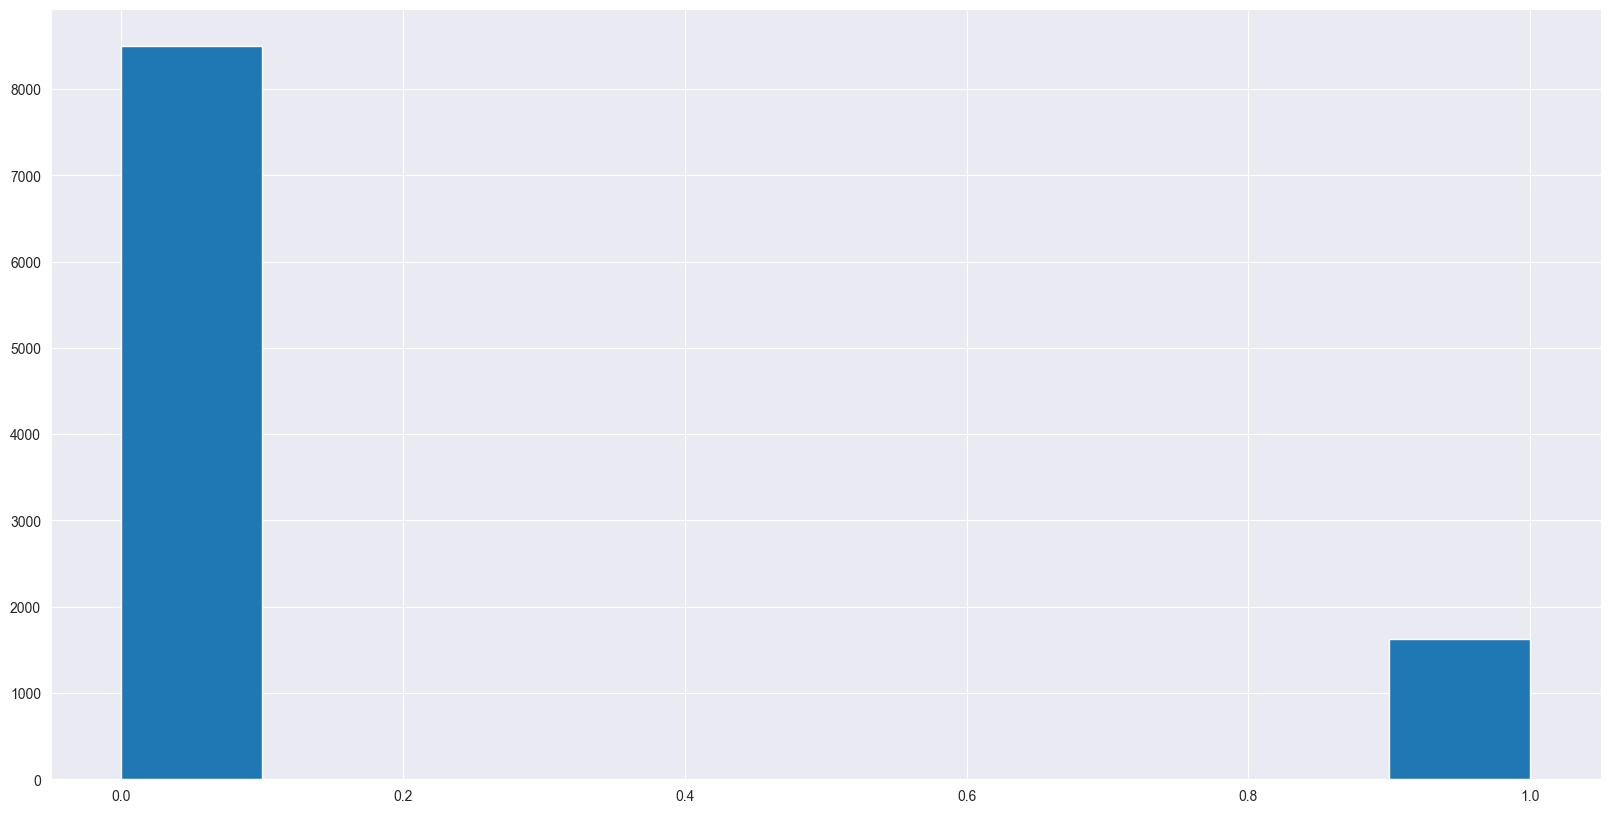

In [17]:
plt.figure(figsize=(20,10))
df['Churn'].hist()
None

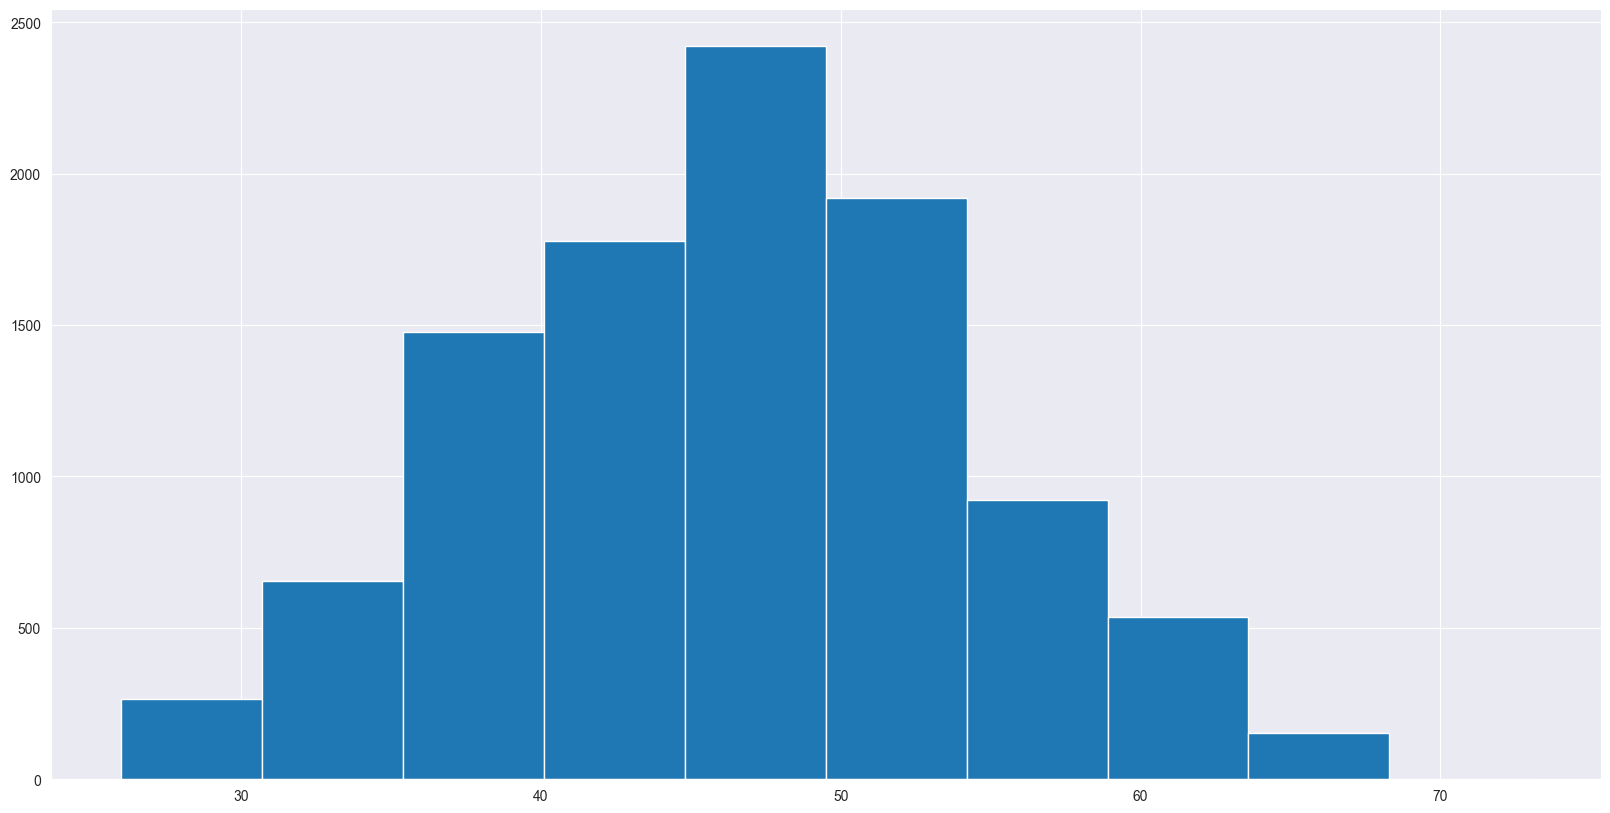

In [18]:
plt.figure(figsize=(20,10))
df['Customer_Age'].hist()
None

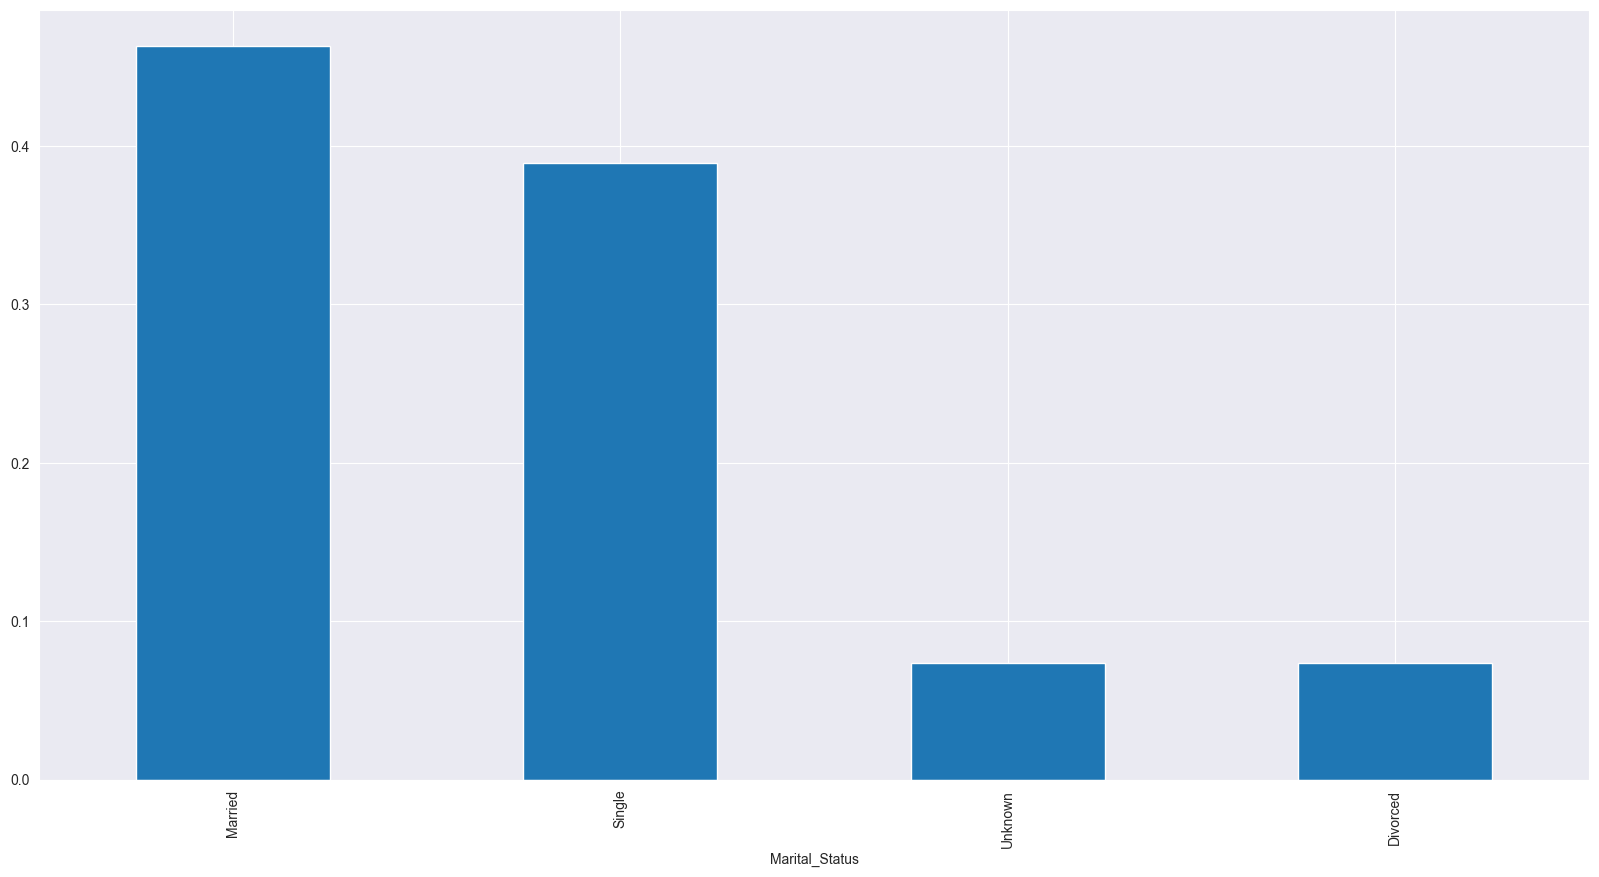

In [20]:
plt.figure(figsize=(20,10))
df.Marital_Status.value_counts('normalize').plot(kind='bar')
None

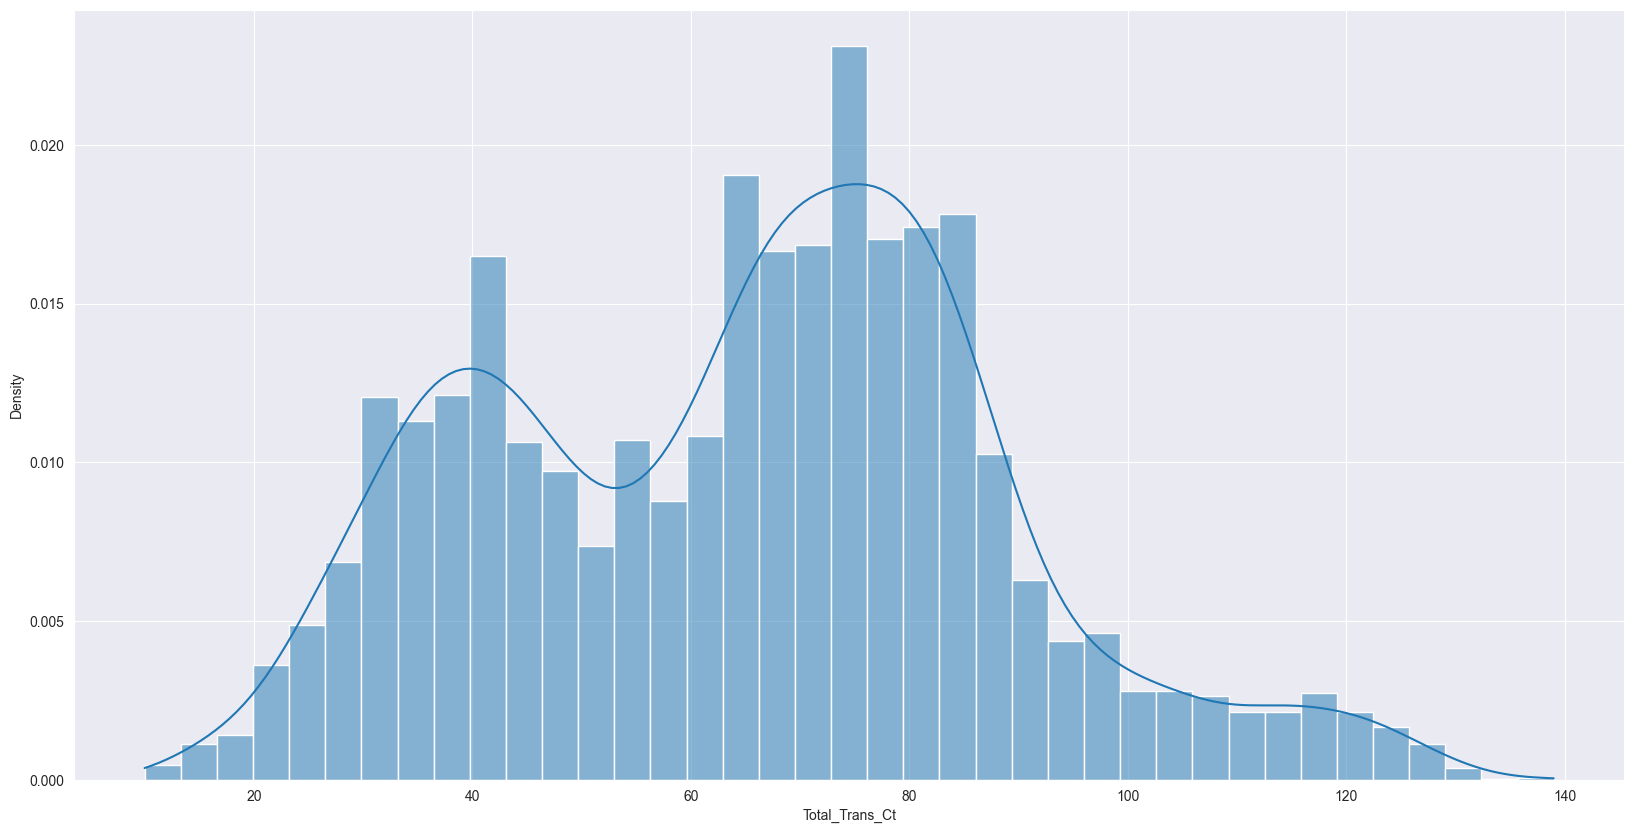

In [21]:
plt.figure(figsize=(20,10))
sns.histplot(df['Total_Trans_Ct'], stat='density', kde=True)
None

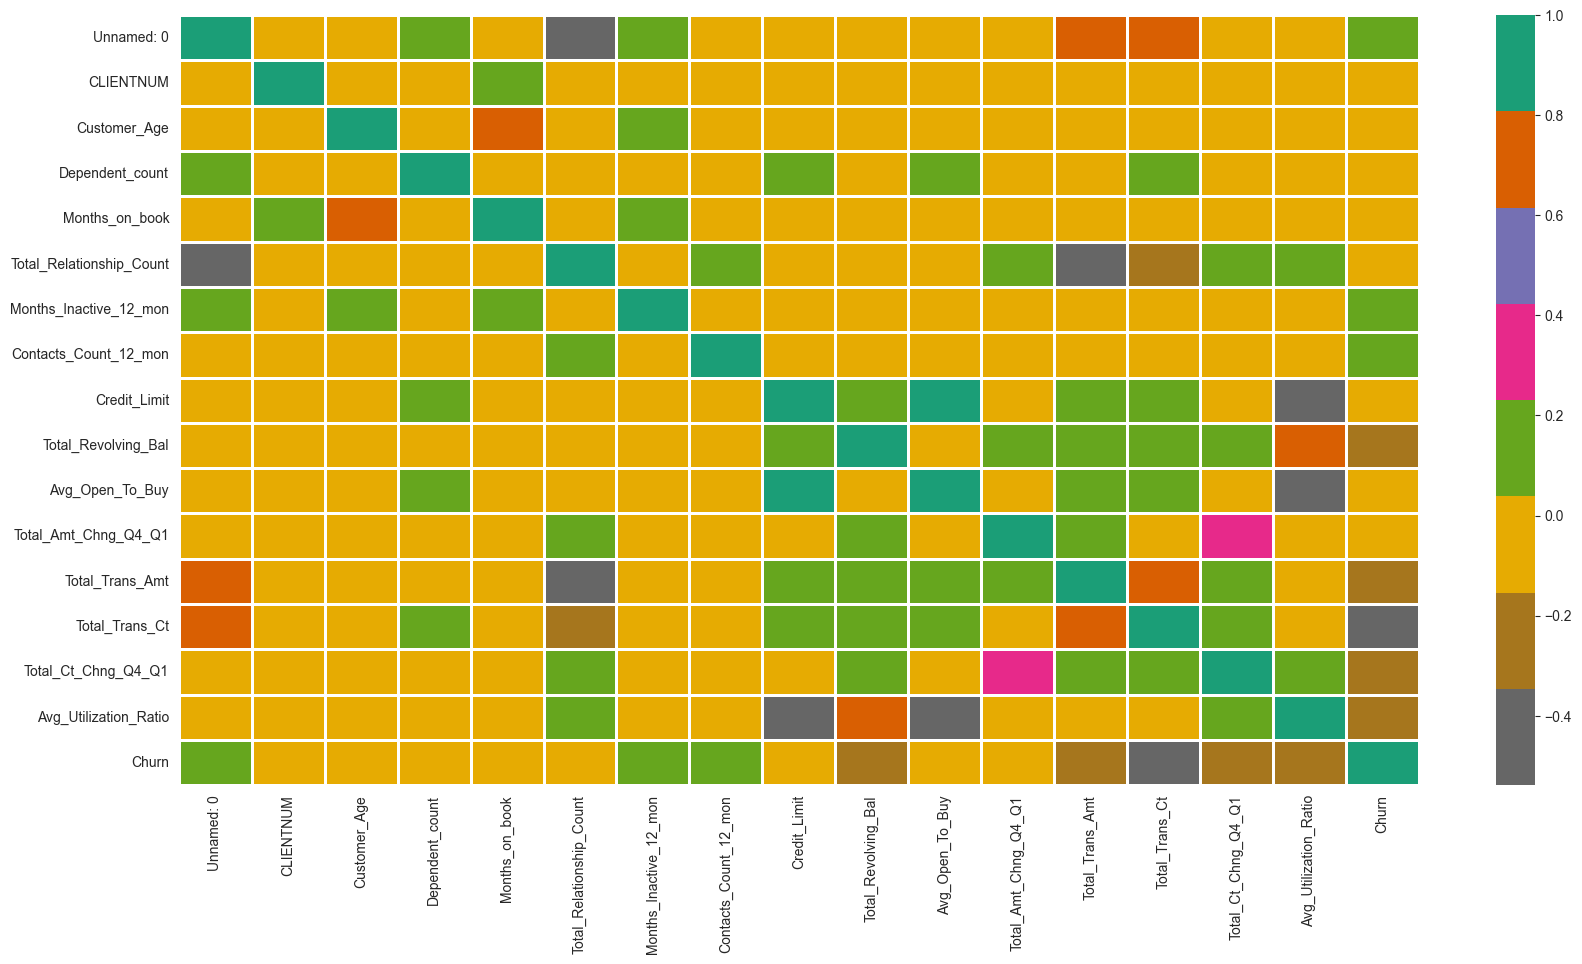

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='Dark2_r', linewidths = 2)
plt.show()

In [23]:
def get_encoded_column(column_name):
    list = []
    groups = df.groupby(column_name)['Churn'].mean()

    for val in df[column_name]:
        list.append(groups.loc[val])

    return list



X = pd.DataFrame()

for col_name in ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']:
    df[f'{col_name}_Churn'] = get_encoded_column(col_name)

In [24]:
y = df['Churn']

In [25]:
keep_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book',
             'Total_Relationship_Count', 'Months_Inactive_12_mon',
             'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
             'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
             'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
             'Gender_Churn', 'Education_Level_Churn', 'Marital_Status_Churn', 
             'Income_Category_Churn', 'Card_Category_Churn']

X[keep_cols] = df[keep_cols]

In [26]:
X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_Churn,Education_Level_Churn,Marital_Status_Churn,Income_Category_Churn,Card_Category_Churn
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.146152,0.152012,0.151269,0.134807,0.160979
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.173572,0.155691,0.169414,0.171862,0.160979
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.146152,0.155691,0.151269,0.157655,0.160979
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.173572,0.152012,0.172230,0.171862,0.160979
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.146152,0.159381,0.151269,0.134807,0.160979


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

rfc = RandomForestClassifier(random_state=42)
lrc = LogisticRegression(solver='newton-cg', max_iter=3000)

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['log2', 'sqrt'],
    'max_depth' : [4,5,100],
    'criterion' :['gini', 'entropy'],
}

cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
cv_rfc.fit(X_train, y_train)

lrc.fit(X_train, y_train)

y_train_preds_rf = cv_rfc.best_estimator_.predict(X_train)
y_test_preds_rf = cv_rfc.best_estimator_.predict(X_test)

y_train_preds_lr = lrc.predict(X_train)
y_test_preds_lr = lrc.predict(X_test)

print('random forest results')
print('test results')
print(classification_report(y_test, y_test_preds_rf))
print('train results')
print(classification_report(y_train, y_train_preds_rf))

print('logistic regression results')
print('test results')
print(classification_report(y_test, y_test_preds_lr))
print('train results')
print(classification_report(y_train, y_train_preds_lr))

random forest results
test results
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2543
           1       0.94      0.81      0.87       496

    accuracy                           0.96      3039
   macro avg       0.95      0.90      0.92      3039
weighted avg       0.96      0.96      0.96      3039

train results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5957
           1       1.00      1.00      1.00      1131

    accuracy                           1.00      7088
   macro avg       1.00      1.00      1.00      7088
weighted avg       1.00      1.00      1.00      7088

logistic regression results
test results
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2543
           1       0.76      0.53      0.63       496

    accuracy                           0.90      3039
   macro avg       0.84      0.75     

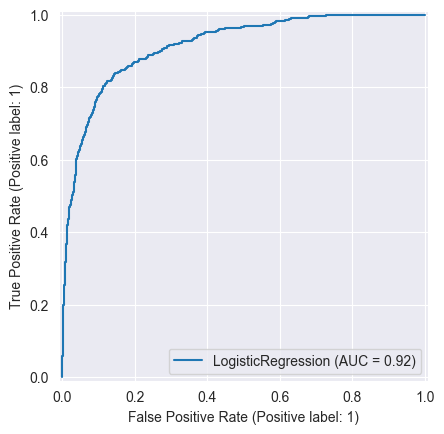

In [28]:
lrc_plot = RocCurveDisplay.from_estimator(lrc, X_test, y_test)

/Users/Kristian/PycharmProjects/Customer-Churn-Prediction/.venv/lib/python3.13/site-packages/sklearn/utils/_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(


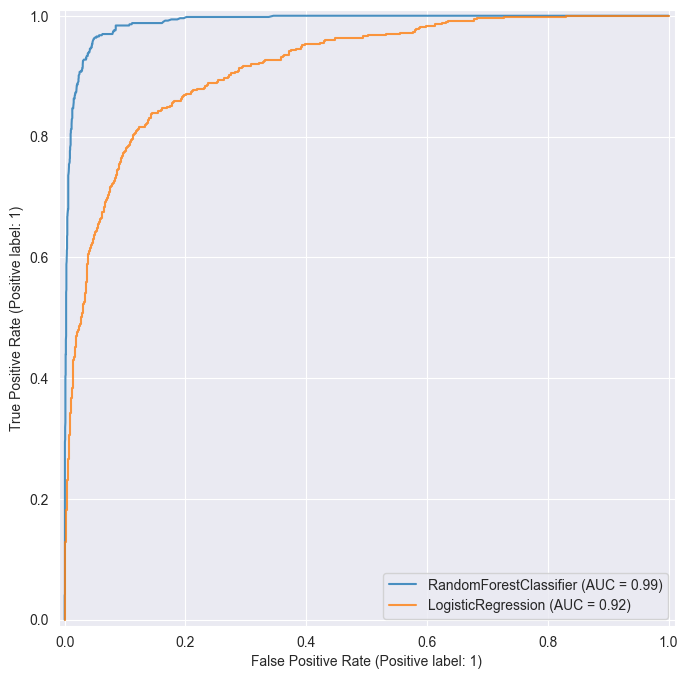

In [29]:
plt.figure(figsize=(15, 8))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(cv_rfc.best_estimator_, X_test, y_test, ax=ax, alpha=0.8)
lrc_plot.plot(ax=ax, alpha=0.8)
plt.show()

In [31]:
dump(cv_rfc.best_estimator_, 'models/rfc_model.pkl')
dump(lrc, 'models/logistic_model.pkl')

['models/logistic_model.pkl']

In [32]:
rfc_model = load('./models/rfc_model.pkl')
lr_model = load('./models/logistic_model.pkl')

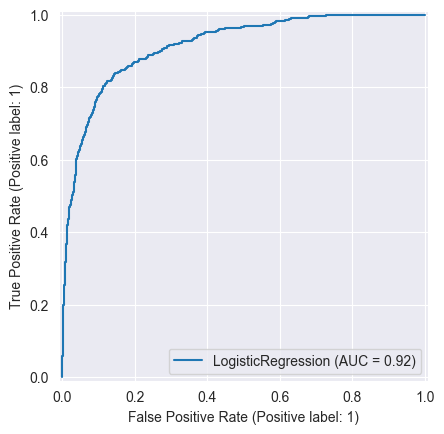

In [33]:
lrc_plot = RocCurveDisplay.from_estimator(lr_model, X_test, y_test)

/Users/Kristian/PycharmProjects/Customer-Churn-Prediction/.venv/lib/python3.13/site-packages/sklearn/utils/_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(


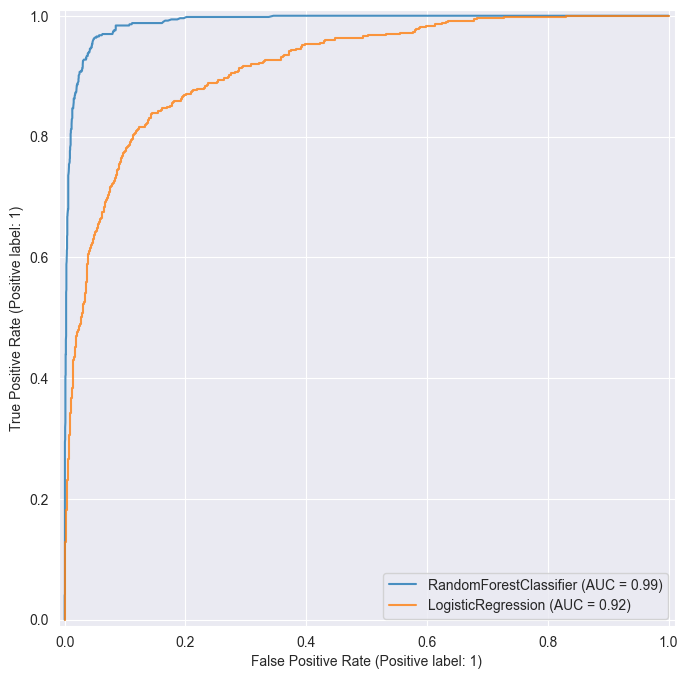

In [34]:
plt.figure(figsize=(15, 8))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc_model, X_test, y_test, ax=ax, alpha=0.8)
lrc_plot.plot(ax=ax, alpha=0.8)
plt.show()

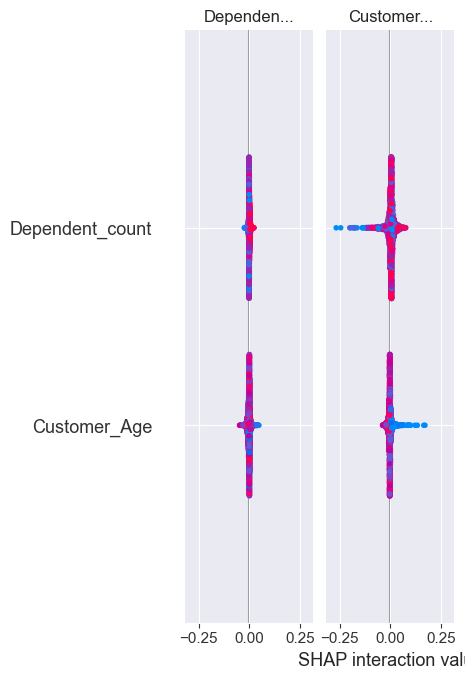

In [35]:
explainer = shap.TreeExplainer(cv_rfc.best_estimator_)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

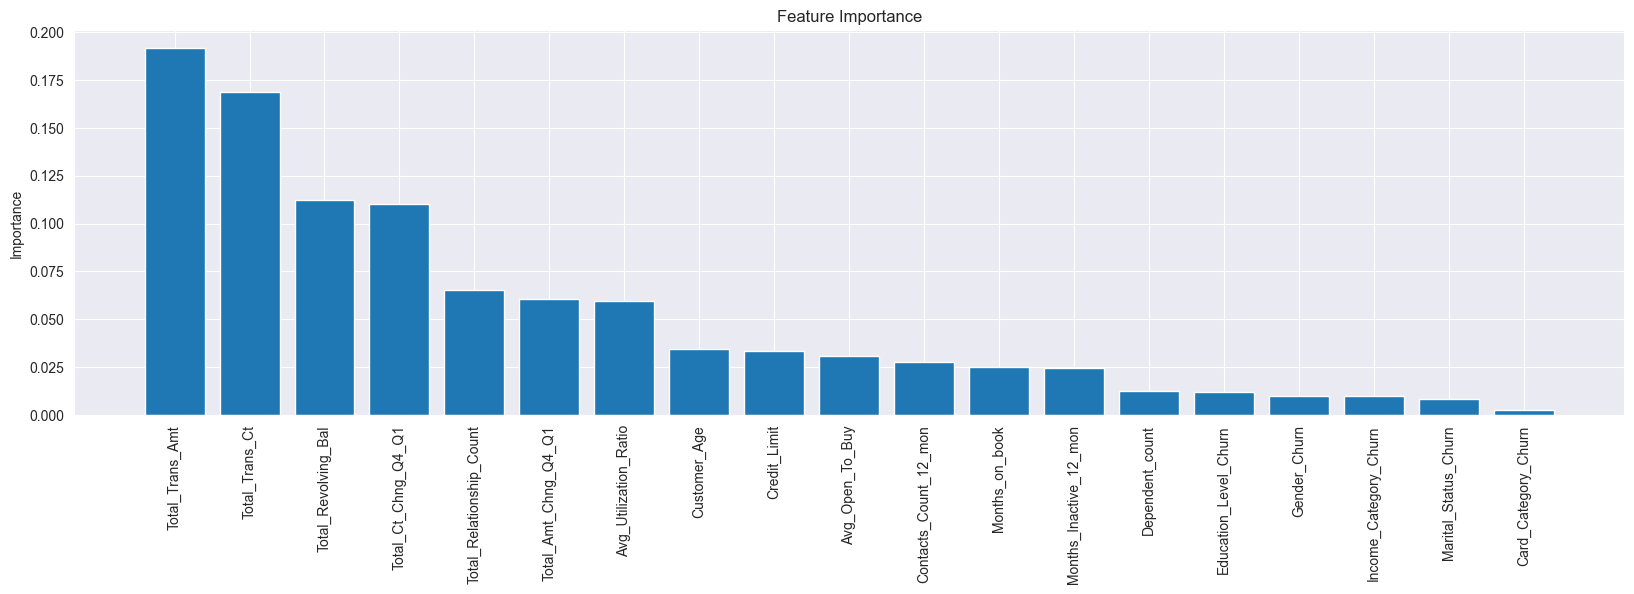

In [36]:
importances = cv_rfc.best_estimator_.feature_importances_

indices = np.argsort(importances)[::-1]


names = [X.columns[i] for i in indices]

plt.figure(figsize=(20,5))

plt.title("Feature Importance")
plt.ylabel('Importance')

plt.bar(range(X.shape[1]), importances[indices])

plt.xticks(range(X.shape[1]), names, rotation=90);

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

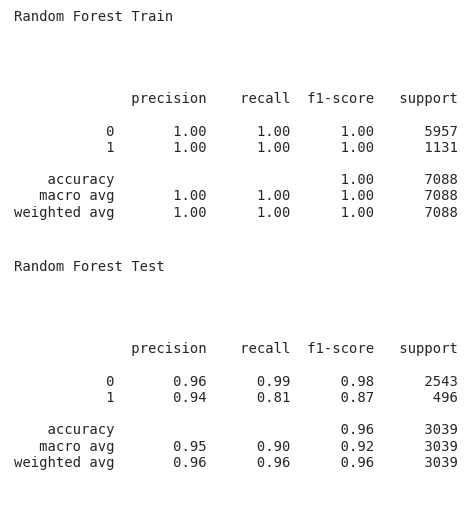

In [37]:
plt.rc('figure', figsize=(5, 5))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 1.25, str('Random Forest Train'), {'fontsize': 10}, fontproperties = 'monospace')
plt.text(0.01, 0.05, str(classification_report(y_test, y_test_preds_rf)), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.text(0.01, 0.6, str('Random Forest Test'), {'fontsize': 10}, fontproperties = 'monospace')
plt.text(0.01, 0.7, str(classification_report(y_train, y_train_preds_rf)), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')

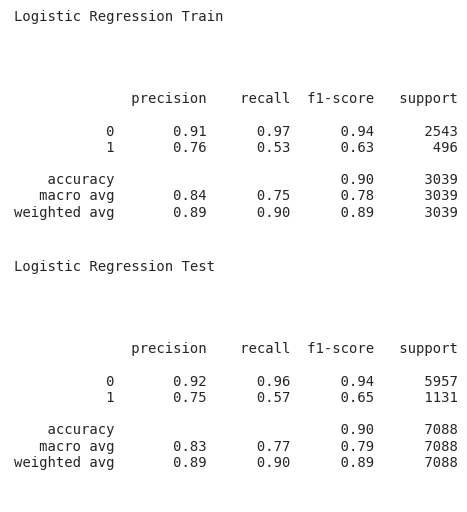

In [38]:
plt.rc('figure', figsize=(5, 5))
plt.text(0.01, 1.25, str('Logistic Regression Train'), {'fontsize': 10}, fontproperties = 'monospace')
plt.text(0.01, 0.05, str(classification_report(y_train, y_train_preds_lr)), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.text(0.01, 0.6, str('Logistic Regression Test'), {'fontsize': 10}, fontproperties = 'monospace')
plt.text(0.01, 0.7, str(classification_report(y_test, y_test_preds_lr)), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off');